<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import


In [1]:
import numpy as np
import sys

from modules.RegressionCooker import RegressionCooker 

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('02-Gradient-descent')


FIDLE 2020 - Practical Work Module
Version              : 0.7 DEV
Notebook name        : 02-Gradient-descent
Run time             : Wednesday 9 December 2020, 20:16:56
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf
Datasets dir         : /home/pjluc/datasets/fidle
Update keras cache   : False


## Step 2 - Instanciate

In [2]:
cooker = RegressionCooker()


FIDLE 2020 - Regression Cooker
Version      : 0.1
Run time     : Wednesday 9 December 2020, 20:16:56


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


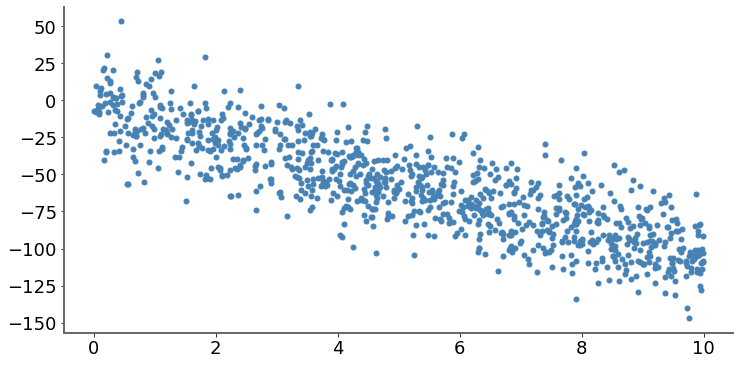

X                :      mean=   4.996  std=   2.885    min=   0.000    max=  10.000
Y                :      mean= -55.951  std=  34.012    min=-182.577    max=  68.331


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.996  std=   2.885    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.732    max=   1.734


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +14.861   -7.446  +1.696   -3.649  -0.017
   20   +6.779   -4.971  +1.132   -2.436  -0.293
   40   +3.177   -3.319  +0.756   -1.626  -0.478
   60   +1.572   -2.216  +0.505   -1.086  -0.601
   80   +0.856   -1.479  +0.337   -0.725  -0.683
  100   +0.537   -0.987  +0.225   -0.484  -0.738
  120   +0.395   -0.659  +0.150   -0.323  -0.775
  140   +0.332   -0.440  +0.100   -0.216  -0.799
  160   +0.303   -0.294  +0.067   -0.144  -0.815
  180   +0.291   -0.196  +0.045   -0.096  -0.826
  200   +0.285   -0.131  +0.030   -0.064  -0.834


**Visualization :**  

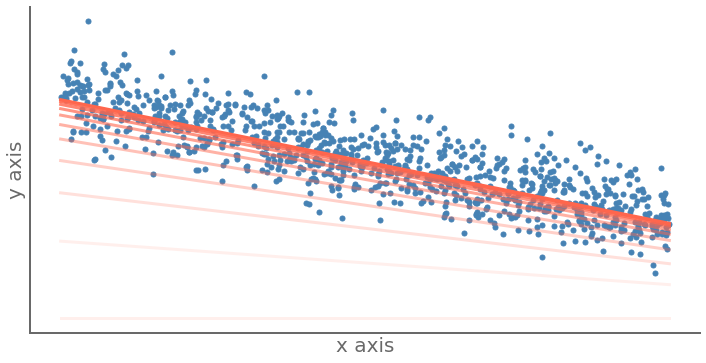

**Loss :**  

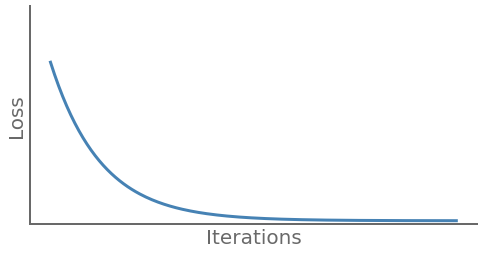

In [5]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.279   -0.241  +4.279   -0.089  -0.882
    1   +0.422   -3.712  -4.220   -0.025  -0.820
    2   +0.148   +0.515  -2.084   +0.023  -0.880
    3   +0.373   +4.373  -4.084   +0.022  -0.848
    4   +0.208   -2.005  +4.132   -0.014  -0.861
    5   +0.209   +1.965  -4.472   -0.019  -0.846
    6   +0.374   +0.684  -6.396   +0.002  -0.847
    7   +0.226   +2.108  -1.949   +0.000  -0.850
    8   +0.152   -2.226  -1.211   +0.005  -0.840
    9   +0.307   +3.815  +3.345   +0.004  -0.853


**Visualization :**  

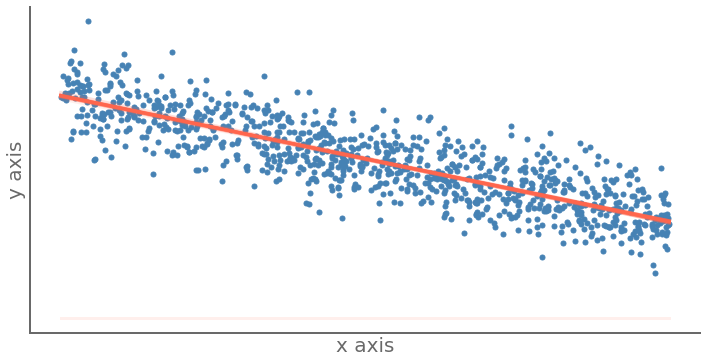

**Loss :**  

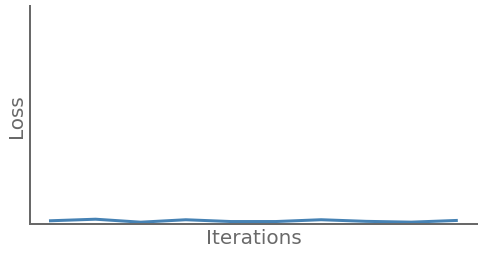

In [6]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [7]:
pwk.end()

End time is : Wednesday 9 December 2020, 20:17:00
Duration is : 00:00:03 279ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>